## House Price Prediction using Machine Learning (Real Life Dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('E:/Datasets/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Lets drop features which are not essential to build our Model.

In [6]:
df1 = df.drop(['area_type','availability','society','balcony'],axis=1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Data Cleaning

#### Removing Null Values

In [7]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df1.shape

(13320, 5)

In [9]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### Feature Engineering

In [10]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [11]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.drop('size',axis=1,inplace=True)
df2.head()

<ipython-input-11-b592a632a623>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [12]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
df2[df2['bhk']>20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


These look like some outliers but we'll deal with them later on.

In [14]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

We can see that some values are in the form of a range. Lets try to solve this issue by taking the average of these range values and putting the average in the place of these range values.

In [15]:
#Lets write a python function to first actually detect these values.

def is_float(x):    
    
    try:
        float(x)
        
    except:
        return False
    
    return True

In [16]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [17]:
#There are a total of 190 samples which are not in the right form!
len(df2[~df2['total_sqft'].apply(is_float)])

190

We used the negate '~' operation above because we wanted to print those values which are not in the form of float, that is, all the values which deviate from the original form that we want.<br>

Had we not used it, we would have got all the values which were in the float form.

Also, we can see that apart from range values, we also have values in units like sq meter and Perch, but we want to have only integer values and that too in sq. feet.

How the below function works:

1. If the input is in the form of range, it will convert both of the individual portions into float and then take their average.

2. If its a normal number, it will just convert the no. into float and thats it.

3. If it is in any other form, it will ignore it.

In [18]:
 def sqft_to_num(x):
    
    tokens = x.split('-')
    
    if len(tokens)==2:
            return (float(tokens[0])+ float(tokens[1]))/2
        
    try:
        return float(x)
    
    except:
        return None

In [19]:
sqft_to_num('2100')

2100.0

In [20]:
sqft_to_num('2100 - 2300')

2200.0

In [21]:
sqft_to_num('2100 Sq meter')

In [22]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(sqft_to_num)
df3.head(5)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [23]:
#For below row, it shows total_sqft as 2475 which is an average of the range 2100-2850
df3.loc[30]

location      Yelahanka
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [24]:
(2100+2850)/2

2475.0

In [25]:
df3.loc[410]

location      Kengeri
total_sqft        NaN
bath                1
price            18.5
bhk                 1
Name: 410, dtype: object

Now, as you can see, while dealing with sqft column, we have also got null values in the place of all the values which were earlier in the form of '2100 sqft' or '4125Perch'. So lets remove those samples.

In [26]:
df3 = df3[df3.total_sqft.notnull()]
df3['total_sqft'].isnull().sum()

0

#### Now, lets add a new column or feature basically - Price per square feet!

In [27]:
df4 = df3.copy()
df4['price_per_sqft'] = (df4['price']*100000) / df4['total_sqft']
df4.head(3)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556


#### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [28]:
len(df4['location'].unique())

1298

Meanwhile, we have a lot of unique categorical values in the location column. Now if we apply one hot encoding, it will create around 1300 columns which we do not want. 

In [29]:
#Strip function remove spaces at the beginning and at the end of the string.
#So first lets make sure that our location data is clean by applying strip function to all the values.

df4['location'] = df4['location'].apply(lambda x: x.strip())
location_stats = df4['location'].value_counts(ascending=False)
location_stats

Whitefield                533
Sarjapur  Road            392
Electronic City           304
Kanakpura Road            264
Thanisandra               235
                         ... 
Hullahalli                  1
Banashankari 2nd Stage      1
Venkateswara Nagar          1
Sundara Nagar               1
Chikbasavanapura            1
Name: location, Length: 1287, dtype: int64

In [30]:
location_stats.values.sum()

13200

In [31]:
len(location_stats[location_stats>10])

240

In [32]:
len(location_stats[location_stats<=10])

1047

### Dimensionality Reduction

#### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [33]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Thyagaraja Nagar          10
Ganga Nagar               10
Nagadevanahalli           10
Basapura                  10
Naganathapura             10
                          ..
Hullahalli                 1
Banashankari 2nd Stage     1
Venkateswara Nagar         1
Sundara Nagar              1
Chikbasavanapura           1
Name: location, Length: 1047, dtype: int64

In [34]:
len(df4['location'].unique())

1287

In [35]:
df4['location'] = df4['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4['location'].unique())

241

In [36]:
df4.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


### Outlier Detection and Removal

### Outlier Removal Using Business Logic

Okay, so in basic real estate practise, usually 1 bhk occupies around 300 sqft. So now considering this value as a threshold, lets remove all the data points that have their bhk/sqft less than 300! Those are most probably outliers.

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [37]:
print(len(df4[df4['total_sqft']/df4['bhk']<300]))
df4[df4['total_sqft']/df4['bhk']<300].head()

744


,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


So there are a total of 744 samples where such outliers exist. Lets remove them.

In [38]:
df4.shape

(13200, 6)

In [39]:
df5 = df4[df4['total_sqft']/df4['bhk'] >= 300]
df5.shape

(12456, 6)

### Outlier Removal Using Standard Deviation and Mean

In [40]:
df5['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [41]:
df5.shape

(12456, 6)

In [42]:
df5['price_per_sqft'].mean()

6308.502826047999

In [43]:
np.mean(df5['price_per_sqft'])

6308.502826047999

In [44]:
def remove_outlier_pps(df):
    df_out = pd.DataFrame()
    for key,data in df.groupby('location'):
        m = data['price_per_sqft'].mean()
        st = data['price_per_sqft'].std() 
        reduced_df = data[(data['price_per_sqft']<= (m + st)) & (data['price_per_sqft']> (m - st))]
        df_out = pd.concat([reduced_df,df_out],ignore_index=True)
    return df_out

In [45]:
df6 = remove_outlier_pps(df5)
df6.shape

(10293, 6)

df_out1 = pd.DataFrame()
m = df5['price_per_sqft'].mean()
st = df5['price_per_sqft'].std() 
reduced_df1 = df5[(df5['price_per_sqft']<= (m + st)) & (df5['price_per_sqft']> (m - st))]
df_out1 = pd.concat([reduced_df1,df_out1],ignore_index=True)

df_out1.shape

#### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

In [46]:
import matplotlib
def scatter_bhk_price(df,location):

    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.scatter(bhk2['total_sqft'], bhk2['price'], c='blue', marker='+', label = '2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'], bhk3['price'], c='green', marker='*', label = '3 BHK', s=50)
    plt.xlabel('Area in Square Feet')
    plt.ylabel('Price of the Houses')
    plt.title(location)
    plt.legend()
    plt.show()

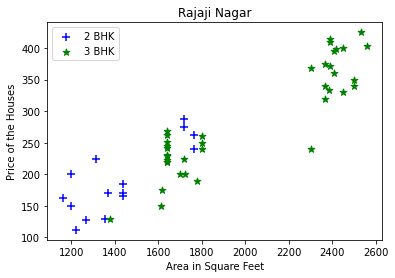

In [47]:
scatter_bhk_price(df6,"Rajaji Nagar")

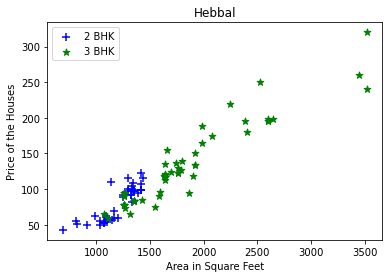

In [48]:
scatter_bhk_price(df6,"Hebbal")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

    {
        '1' : {
            'mean': 4000,
            'std: 2000,
            'count': 34
        },
        '2' : {
            'mean': 4300,
            'std: 2300,
            'count': 22
        },    
    }

#### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [49]:
#num_list = [1, 2, 3]
#alpha_list = ['a', 'b', 'c']
#num1_list = [10,20,30]

#for number in num_list:
  # for letter in alpha_list:
   #     print(letter)
    #for bigger_num in num1_list:
     #   print(bigger_num)

In [50]:
a={1:'abc', 2:'cdg'}
a.get(1)

'abc'

In [51]:
def outlier_bhk_price(df):
    exclude_indices = np.array([])
    
    for key,location in df.groupby('location'):
        bhk_dict = {}
    
        for key_bhk, data_bhk in location.groupby('bhk'):
            bhk_dict[key_bhk] = { 'mean': data_bhk['price_per_sqft'].mean(),
                                  'std': data_bhk['price_per_sqft'].std(),
                                  'count': data_bhk['price_per_sqft'].shape[0] }
            print('BHK DICTIONARY IS :',bhk_dict)
            
        for key_bhk, data_bhk in location.groupby('bhk'):
            stats = bhk_dict.get(key_bhk-1)
            print('Stats dictionary is: ',stats)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,data_bhk[data_bhk['price_per_sqft']< (stats['mean'])].index.values)
            
    return df.drop(exclude_indices, axis='index')
            

In [52]:
#for key,location in df6.groupby('location'):
 #   bhk_dict = {}
    
#for key_bhk, data_bhk in location.groupby('bhk'):
 #   bhk_dict[key_bhk] = { 'mean': data_bhk['price_per_sqft'].mean(),
  #                        'std': data_bhk['price_per_sqft'].std(),
   #                       'count': data_bhk['price_per_sqft'].shape[0] }

In [53]:
outlier_bhk_price(df6)

BHK DICTIONARY IS : {2: {'mean': 11983.805668016194, 'std': nan, 'count': 1}}
BHK DICTIONARY IS : {2: {'mean': 11983.805668016194, 'std': nan, 'count': 1}, 3: {'mean': 11756.16905248807, 'std': 859.3108436150235, 'count': 3}}
BHK DICTIONARY IS : {2: {'mean': 11983.805668016194, 'std': nan, 'count': 1}, 3: {'mean': 11756.16905248807, 'std': 859.3108436150235, 'count': 3}, 4: {'mean': 15018.711280365416, 'std': 1.5037640953012925, 'count': 3}}
Stats dictionary is:  None
Stats dictionary is:  {'mean': 11983.805668016194, 'std': nan, 'count': 1}
Stats dictionary is:  {'mean': 11756.16905248807, 'std': 859.3108436150235, 'count': 3}
BHK DICTIONARY IS : {1: {'mean': 5952.380952380952, 'std': nan, 'count': 1}}
BHK DICTIONARY IS : {1: {'mean': 5952.380952380952, 'std': nan, 'count': 1}, 2: {'mean': 7931.806799837383, 'std': 1640.0670823302116, 'count': 8}}
BHK DICTIONARY IS : {1: {'mean': 5952.380952380952, 'std': nan, 'count': 1}, 2: {'mean': 7931.806799837383, 'std': 1640.0670823302116, 'cou

,location,total_sqft,bath,price,bhk,price_per_sqft
0,other,2770.0,4.0,290.0,3,10469.314079
3,other,600.0,1.0,38.0,1,6333.333333
6,other,1500.0,2.0,185.0,2,12333.333333
8,other,4395.0,3.0,240.0,3,5460.750853
9,other,845.0,2.0,55.0,2,6508.875740
...,...,...,...,...,...,...
10288,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
10289,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
10290,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
10291,1st Block Jayanagar,2750.0,4.0,413.0,4,15018.181818


In [54]:
df7 = outlier_bhk_price(df6)
df7.shape

BHK DICTIONARY IS : {2: {'mean': 11983.805668016194, 'std': nan, 'count': 1}}
BHK DICTIONARY IS : {2: {'mean': 11983.805668016194, 'std': nan, 'count': 1}, 3: {'mean': 11756.16905248807, 'std': 859.3108436150235, 'count': 3}}
BHK DICTIONARY IS : {2: {'mean': 11983.805668016194, 'std': nan, 'count': 1}, 3: {'mean': 11756.16905248807, 'std': 859.3108436150235, 'count': 3}, 4: {'mean': 15018.711280365416, 'std': 1.5037640953012925, 'count': 3}}
Stats dictionary is:  None
Stats dictionary is:  {'mean': 11983.805668016194, 'std': nan, 'count': 1}
Stats dictionary is:  {'mean': 11756.16905248807, 'std': 859.3108436150235, 'count': 3}
BHK DICTIONARY IS : {1: {'mean': 5952.380952380952, 'std': nan, 'count': 1}}
BHK DICTIONARY IS : {1: {'mean': 5952.380952380952, 'std': nan, 'count': 1}, 2: {'mean': 7931.806799837383, 'std': 1640.0670823302116, 'count': 8}}
BHK DICTIONARY IS : {1: {'mean': 5952.380952380952, 'std': nan, 'count': 1}, 2: {'mean': 7931.806799837383, 'std': 1640.0670823302116, 'cou

(7365, 6)

In [55]:
for key,location in df6.groupby('location'):
    for key_bhk, data_bhk in location.groupby('bhk'):
        print(key_bhk)
        print(data_bhk)

2
                  location  total_sqft  bath  price  bhk  price_per_sqft
10290  1st Block Jayanagar      1235.0   2.0  148.0    2    11983.805668
3
                  location  total_sqft  bath  price  bhk  price_per_sqft
10287  1st Block Jayanagar      1630.0   3.0  194.0    3    11901.840491
10288  1st Block Jayanagar      1875.0   2.0  235.0    3    12533.333333
10289  1st Block Jayanagar      1200.0   2.0  130.0    3    10833.333333
4
                  location  total_sqft  bath  price  bhk  price_per_sqft
10286  1st Block Jayanagar      2850.0   4.0  428.0    4    15017.543860
10291  1st Block Jayanagar      2750.0   4.0  413.0    4    15018.181818
10292  1st Block Jayanagar      2450.0   4.0  368.0    4    15020.408163
1
                 location  total_sqft  bath  price  bhk  price_per_sqft
10275  1st Phase JP Nagar       840.0   2.0   50.0    1     5952.380952
2
                 location  total_sqft  bath  price  bhk  price_per_sqft
10272  1st Phase JP Nagar      1394.0   2.0 

In [56]:
for key,location in df6.groupby('location'): 
    print(key)
    print(location)

1st Block Jayanagar
                  location  total_sqft  bath  price  bhk  price_per_sqft
10286  1st Block Jayanagar      2850.0   4.0  428.0    4    15017.543860
10287  1st Block Jayanagar      1630.0   3.0  194.0    3    11901.840491
10288  1st Block Jayanagar      1875.0   2.0  235.0    3    12533.333333
10289  1st Block Jayanagar      1200.0   2.0  130.0    3    10833.333333
10290  1st Block Jayanagar      1235.0   2.0  148.0    2    11983.805668
10291  1st Block Jayanagar      2750.0   4.0  413.0    4    15018.181818
10292  1st Block Jayanagar      2450.0   4.0  368.0    4    15020.408163
1st Phase JP Nagar
                 location  total_sqft  bath  price  bhk  price_per_sqft
10266  1st Phase JP Nagar      2825.0   4.0  250.0    4     8849.557522
10267  1st Phase JP Nagar      1875.0   3.0  167.0    3     8906.666667
10268  1st Phase JP Nagar      1500.0   5.0   85.0    5     5666.666667
10269  1st Phase JP Nagar      2065.0   4.0  210.0    3    10169.491525
10270  1st Phase 

In [57]:
#for key,location in df6.groupby('location'): 
    #for key_bhk, data_bhk in location.groupby('bhk'):
        #print(location)

####  Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties 

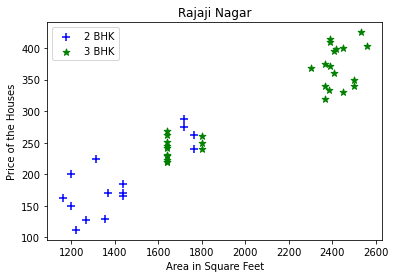

In [58]:
scatter_bhk_price(df7,"Rajaji Nagar")

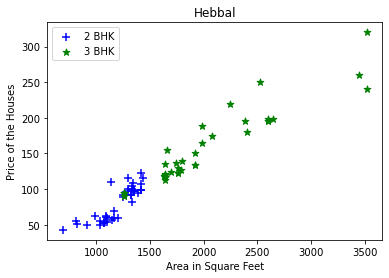

In [59]:
scatter_bhk_price(df7,"Hebbal")

Text(0, 0.5, 'Number of Houses')

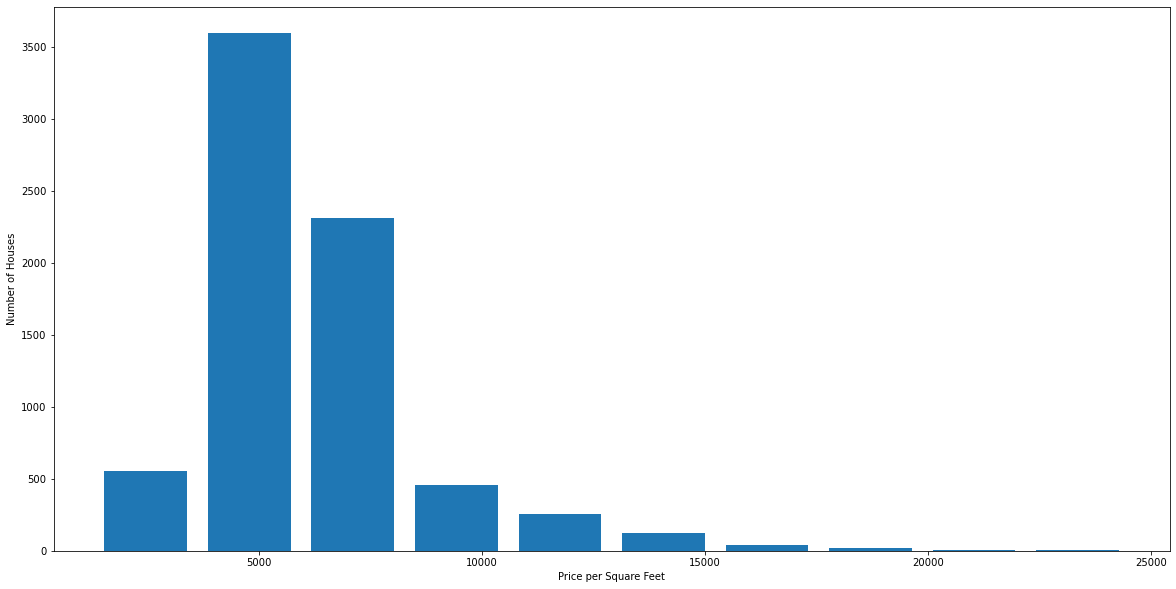

In [60]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7['price_per_sqft'],rwidth=0.8)
plt.xlabel('Price per Square Feet')
plt.ylabel('Number of Houses')

### Outlier Removal Using Bathrooms Feature

In [61]:
#Lets explore the bathroom feature
df7['bath'].unique()

array([ 4.,  1.,  2.,  3.,  8.,  9.,  5.,  6., 12., 16.,  7., 13.])

Text(0, 0.5, 'Count of Houses')

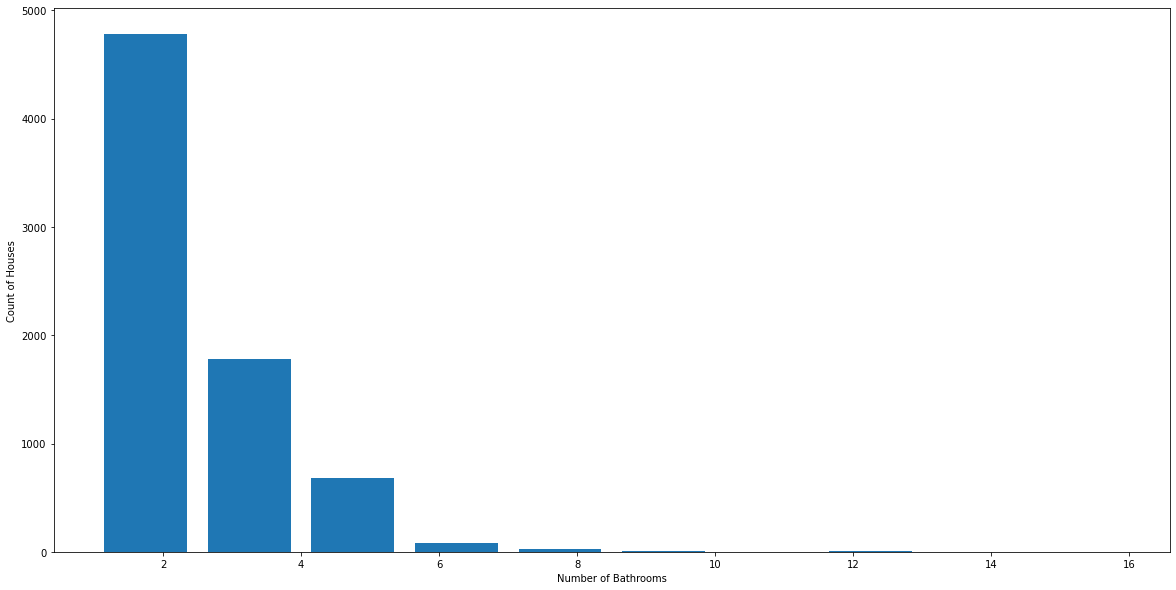

In [62]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7['bath'],rwidth=0.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count of Houses')

In [63]:
#Lets see the houses with more than 10 bathrooms!
df7[df7['bath']>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
547,other,12000.0,12.0,525.0,10,4375.000000
636,other,10000.0,16.0,550.0,16,5500.000000
1371,other,6000.0,12.0,150.0,11,2500.000000
1702,other,5425.0,13.0,275.0,13,5069.124424
4985,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000


#### It is unusual to have 2 more bathrooms than number of bedrooms in a home

Again the business manager has a conversation with you (i.e. a data scientist) that if you have bathrooms more than 2+ no. of bedrooms, then it is most probably an outlier and you should remove it.

In [64]:
df7.shape

(7365, 6)

In [65]:
df8 = df7[df7['bath'] < df7['bhk']+2 ]
df8.shape

(7286, 6)

Now our Dataframe is very clean! Lets move towards the one hot encoding of our data. But before that, one last thing - the price_per_sqft feature is of no use now. We only created it in order to be able to use it while cleaning our data. So lets remove it.

In [66]:
df9 = df8.drop(['price_per_sqft'], axis=1)
df9.head(3)

,location,total_sqft,bath,price,bhk
0,other,2770.0,4.0,290.0,3
3,other,600.0,1.0,38.0,1
6,other,1500.0,2.0,185.0,2


### Use One Hot Encoding For Location

In [67]:
dummies = pd.get_dummies(df9['location'], drop_first=True)
df10 = pd.concat([df9,dummies], axis='columns')
df10.shape

(7286, 245)

In [68]:
df11 = df10.drop(['location'], axis='columns')
df11.shape

(7286, 244)

### Model Building

In [69]:
x = df11.drop(['price'], axis ='columns')
y = df11['price']

In [70]:
x.head(3)

,total_sqft,bath,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2770.0,4.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,600.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1500.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [71]:
y.head(3)

0    290.0
3     38.0
6    185.0
Name: price, dtype: float64

### Train-Test Splitting

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [73]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train, y_train)
linear.score(x_test, y_test)

0.8022439665335961

### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [74]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0 )
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.78602541, 0.84417211, 0.82701555, 0.7907633 , 0.86052889])

#### We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

def find_best_model_using_grid_search_cv(X,Y):
    
    models_dict = {
        'Linear Regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        
        'Lasso Regression': {
            'model': Lasso(),
            'params': {
                'selection': ['random', 'cyclic'],
                'max_iter': [500, 1000, 1500],
                'alpha': [1,2]
            }
        },
        
        'Decision Tree Regressor': {
            'model': DecisionTreeRegressor(),
            'params': {
                'splitter': ['best', 'random'],
                'criterion': ['mse', 'friedman_mse']
                
            }
        },
        
        'Random Forest Regressor': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100, 175]    
            }
        },
        
        'XG Boost': {
            'model': XGBRegressor(),
            'params': {
                'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
                'eta': [0.01, 0.1, 0.15, 0.3],
                'max_depth': [3,5,7,10]
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for model_name, model_details in models_dict.items():
        
        gscv = GridSearchCV(model_details['model'], model_details['params'], cv=cv, return_train_score=False)
        gscv.fit(X, Y)
        
        scores.append({
            'Model': model_name,
            'Best Parameters': gscv.best_params_,
            'Best Score': gscv.best_score_
        })
        
    return pd.DataFrame(scores)

In [76]:
find_best_model_using_grid_search_cv(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

,Model,Best Parameters,Best Score
0,Linear Regression,{'normalize': True},0.821701
1,Lasso Regression,"{'alpha': 1, 'max_iter': 500, 'selection': 'ra...",0.704433
2,Decision Tree Regressor,"{'criterion': 'mse', 'splitter': 'random'}",0.749612
3,Random Forest Regressor,{'n_estimators': 100},0.771695
4,XG Boost,"{'eta': 0.3, 'gamma': 0, 'max_depth': 5}",0.797807


####  Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

In [77]:
x.head(2)

,total_sqft,bath,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2770.0,4.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,600.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Now, since a LinearRegressor object had already been created earlier, we will use that in order to make new and random predictions.

In [78]:
def predict_price(sqft, bath, bhk, location):
    loc_index = np.where(x.columns == location)[0][0]
    feature_array = np.zeros(len(x.columns))
    
    feature_array[0] = sqft
    feature_array[1] = bath
    feature_array[2] = bhk
    
    if loc_index >= 0:
        feature_array[loc_index] = 1
        
    return linear.predict([feature_array])

In [79]:
predict_price(2000, 3, 3, 'Rajaji Nagar')

301.04252964526654

In [82]:
predict_price(3000, 3, 3, '1st Phase JP Nagar')

242.34100196773738

In [84]:
predict_price(1000, 2, 2, 'Indira Nagar')

185.56547515696988

In [85]:
predict_price(750, 1, 1, 'Indira Nagar')

162.19321138809732

### Export the tested model to a pickle file

In [87]:
import pickle

with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(linear,f)

### Export location and column information to a file that will be useful later on in our prediction application

In [89]:
import json

columns = {
    'data_coulmns' : [column_name.lower() for column_name in x.columns]
}

with open('column_names.json', 'w') as f:
    f.write(json.dumps(columns))